<a href="https://colab.research.google.com/github/rnrios/IntroML/blob/master/binary_classification/sales_prediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


data = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')

#Pre-processing

In [ ]:
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
swap = {
    'no': 0,
     'yes': 1
}
data.sold = data.sold.map(swap)

In [ ]:
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import datetime

current_year = datetime.today().year
data['model_age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [ ]:
data = data.drop(columns=['Unnamed: 0', 'model_year'], axis=1)
data.head()  

,mileage_per_year,price,sold,model_age
0,21801,30941.02,1,21
1,7843,40557.96,1,23
2,7109,89627.50,0,15
3,26823,95276.14,0,6
4,7935,117384.68,1,7


#Estimation by LinearSVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

X = data[['mileage_per_year', 'price', 'model_age']]
Y = data['sold']

SEED = 13
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=.25, 
                                                    random_state=SEED, 
                                                    stratify=Y)
model = LinearSVC(max_iter=1e5, random_state=SEED)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

acc = accuracy_score(Y_test, predictions)
print("Accuracy on test dataset: %.2f"% acc)

Accuracy on test dataset: 0.58


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn.dummy import DummyClassifier


dummy = DummyClassifier()
dummy.fit(X_train, Y_train)
acc = dummy.score(X_test, Y_test)
print("Dummy's accuracy {:.2f}".format(acc))

Dummy's accuracy 0.58


#Estimation by SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 13
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=.25, 
                                                    random_state=SEED, 
                                                    stratify=Y)
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

model = SVC(gamma='auto', max_iter=1e6, random_state=SEED)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

acc = accuracy_score(Y_test, predictions)
print("Accuracy on test dataset: %.2f"% acc)  

Accuracy on test dataset: 0.77


#Decision Tree

In [ ]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X = data[['mileage_per_year', 'price', 'model_age']]
Y = data['sold']

SEED = 13
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=.25, 
                                                    random_state=SEED, 
                                                    stratify=Y)

model = DecisionTreeClassifier(random_state=SEED, max_depth=2)
model.fit(X_train_raw, Y_train)
predictions = model.predict(X_test_raw)

acc = accuracy_score(Y_test, predictions)
print("Accuracy on test dataset: %.2f"% acc)

Accuracy on test dataset: 0.77


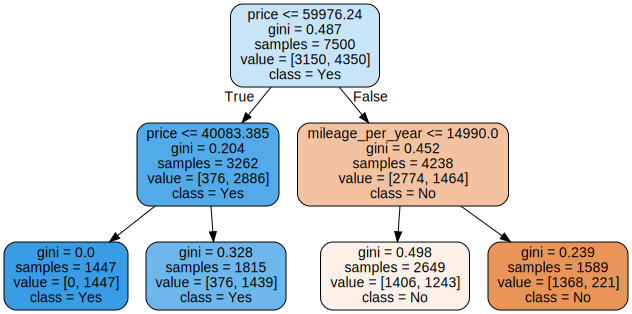

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None,
                           filled = True, rounded = True,
                           feature_names = X.columns,
                           class_names = ["No", "Yes"])
graphic = graphviz.Source(dot_data)
graphic